# Predicting heart disease using machine learning

This notebook looks into using various Python based machine learning and data science libraries in an attempt to build a machine learning model of predicting whether or not someone has heart disease on their medical attributes.

We are going to take the following approach: 

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition :

In a statement,
> Given clinical parameters about a patient, can we predict wheter they have heart disease or not ?

## 2.Data :

The orginal data came from the Cleaveland data from the UCI Machine Leaning Repository.

There is also a version of it available on Kaggle . https://www.kaggle.com/ronitf/heart-disease-uci


## 3.Evaluation

> If we can reach 95% accuracy at preciting whether or not a patient has a heart disease during the proof of concept , we'll pursue the projects


## 4. Features

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a **data dictionary**.


### Heart Disease Data Dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.


## Preparing the tools

We're going to use pandas ,Matplotlib and Numpy for data analysis and manipulation. 



In [5]:
#Import all the tools we need

#Regular EDA(Exploratory Data Analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline 


#Model from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [6]:
df=pd.read_csv("data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.shape#(rows,columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset.

* 1.What questions are you trying to solve?
* 2.What kind of data do we have and how do we treat different types?
* 3.What's missing from the data and how do you deal with it ?
* 4.Where are the outliers and why should you care about them?
* 5.How can you add,change or remove features to get more out of our of your data ?

In [11]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [13]:
#Let's find out how many of each class there
df["target"].value_counts()#Balanced data set

1    165
0    138
Name: target, dtype: int64

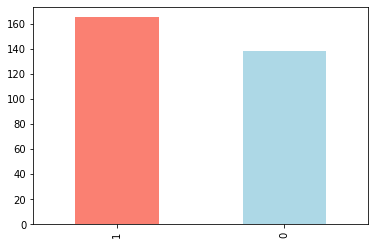

In [23]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [26]:
df.isna().sum()#Missing value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [27]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Sex

In [28]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [31]:
## Compare target column with sex column
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


In [34]:
72/96*100,93/207*100,(75+45)/2#60% (total)chance that they have heart disease ,75% if female,45% if male.

(75.0, 44.927536231884055, 60.0)

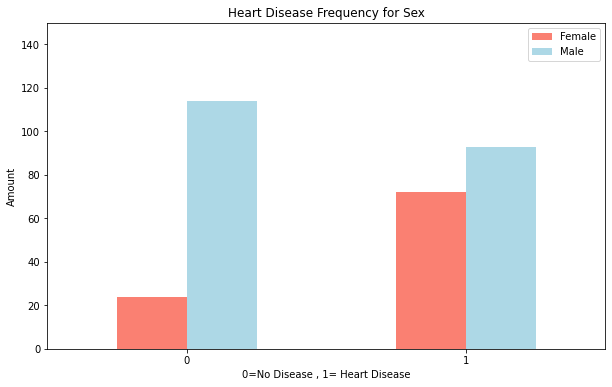

In [50]:
pd.crosstab(df["target"],df["sex"]).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"]);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0=No Disease , 1= Heart Disease")
plt.ylim(0,150)
plt.ylabel("Amount");
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);


### Usually we compare targets and other columns to start exploring patterns

In [54]:
df.thalach.value_counts()

162    11
163     9
160     9
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: thalach, Length: 91, dtype: int64

## Age vs MAX heart rate for Heart Disease

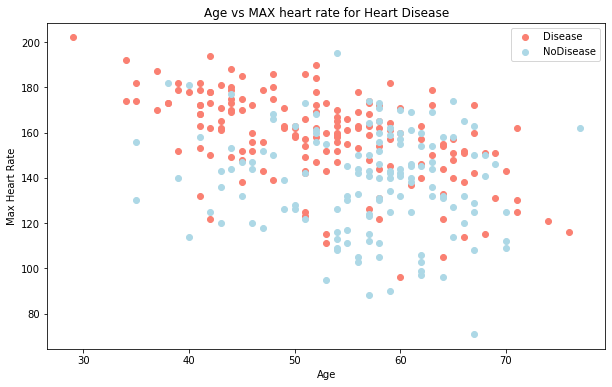

In [68]:
#Create another figure
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df["target"]==1],df.thalach[df.target==1],c="salmon");
plt.xlabel("Age")
plt.ylabel("Max Heart Rate");
plt.title("Age vs MAX heart rate for Heart Disease");
#Scatter with negative Examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue");
plt.legend(["Disease","NoDisease"]);

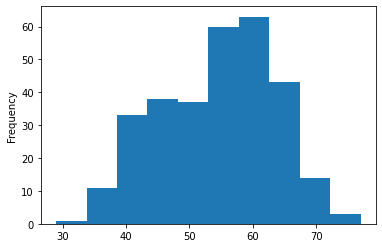

In [71]:
#Check the distribution of the age column with a Histogram 
df.age.plot.hist();

In [75]:
## Heart Disease Frequency per chest pain type

#cp - chest pain type

#0: Typical angina: chest pain related decrease blood supply to the heart
# 1: Atypical angina: chest pain not related to heart
# 2: Non-anginal pain: typically esophageal spasms (non heart related)
# 3: Asymptomatic: chest pain not showing signs of disease

pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


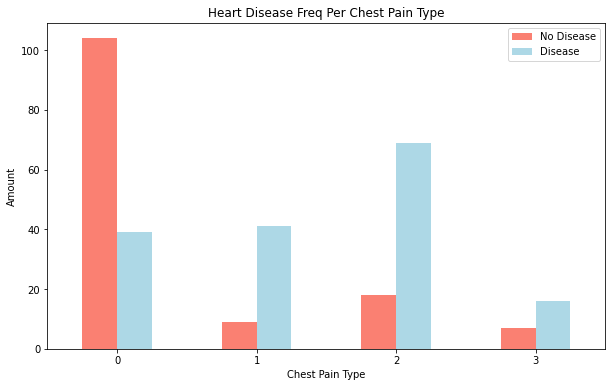

In [79]:
# Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"]);

#Add some communication
plt.title("Heart Disease Freq Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [80]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
# Make the corelation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


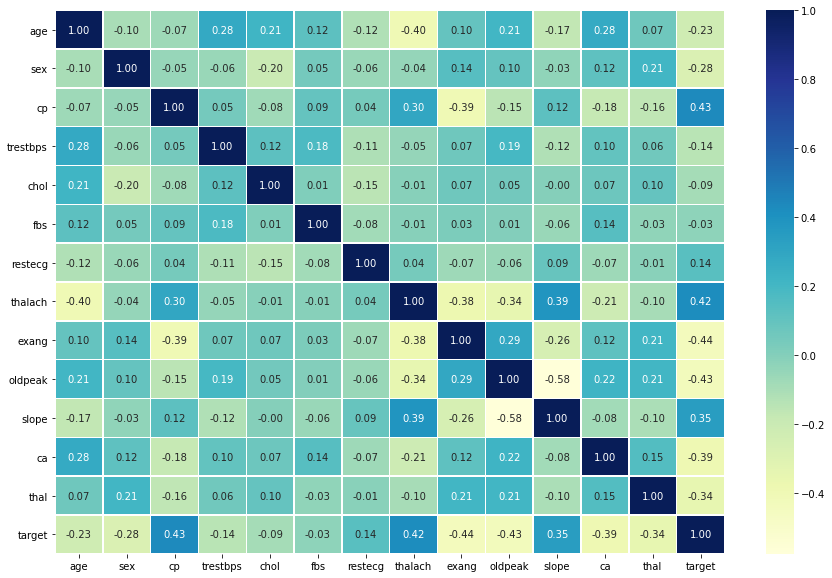

In [86]:
#Lets make our correlation matrix a little preetier
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");

Much better. A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).
POSITIVE corelation means as one feature increases other feature also increases with the related value.
Negative corelation means as one feature decreases other feature also decreases with the related value.

For example :
    Here cp vs target (cp=horizontal,target=vertical) cp is 0.07 and target is 0.43 Positive corelation when you see in graph above as cp
    increases heart disease rate also increases comparitively.
    
    Here exang vs target exang=0.10 and target=-0.44 exang is 1 if person do exercise and have chest pain and 0 if he does not do exercise
    so corr matrix says that as exang =1 chances of heart disease will become i.e target=0 as per data.

## 5.Modelling

In [87]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [88]:
#Split data into X and y
X=df.drop("target",axis=1)
y=df["target"]


In [91]:
#Split data into train and test set
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [92]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [93]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now we've got our data split into training and test sets, it's time to build machine learning model.

We will train it(find patterns in it) on training set

And we will test it (use the patterns) on the test data set.

We are going to try three different machine learning models:

**1. Logistic regression**

**2. KNN**

**3. Random Forest Classifier**

In [169]:
#Put models in a dictionary
models_dict={"Logistic Regression" : LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "RandomForest":RandomForestClassifier()
       }

#Create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine Learning models.
    models:A dict of different Scikit-learn machine learning models.
    X_train:training data (no labels)
    X_test:testing data(no labels)
    y_train: training labels
    y_test:testing labels
    
    """
    
    #Set random seed
    np.random.seed(42)
    
    #Make a dictionary to keep model scores
    model_scores={}
    
    #Loop through the models
    for name,model in models.items():
        #Fit the model to the data
        model.fit(X_train,y_train)
        #Evaluate the model ad append its score to model_scores
        model_scores[name]=model.score(X_test,y_test)
        
    return model_scores
    

In [103]:
model_scores=fit_and_score(models=models_dict,
                           X_train=X_train,
                           X_test=X_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores

C:\Users\hp\Desktop\ML_Project\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

# Model Comparison

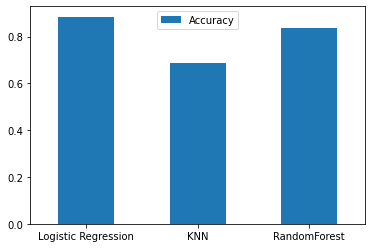

In [107]:
model_compare=pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation=0);

Now We've got a baseline model and we know model's first score evaluation can be improved.
so we take this model as baseline metrics

What should we do ?

Let's look at the following:

constants for all:

* Hyperparameter Tuning
* Feature Importance

Depend upon problem classification or regression :

* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve(AUC)

## Hyper parameter tuning (by hand)

In [118]:
## Lets tune KNN

train_scores=[]
test_scores=[]

#Create a list of different values for n_neighbours

neighbors=range(1,21)


#Setup KNN instance
knn=KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors=i)
    
    #Fit the alogorithm
    knn.fit(X_train,y_train)
    
    #Update the training scores list..
    train_scores.append(knn.score(X_train,y_train))
    
    #Update the test scores list..
    test_scores.append(knn.score(X_test,y_test))
    
    




In [119]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [120]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum Score on the test data : 75.41%


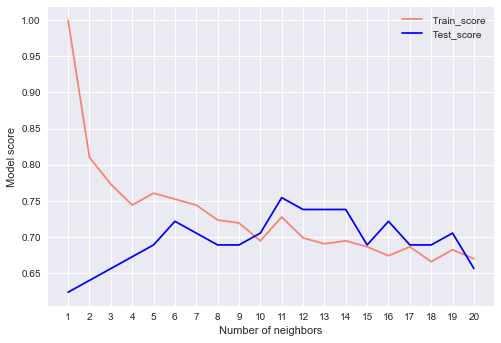

In [135]:
plt.style.use("seaborn")
plt.plot(neighbors,train_scores,label=" Train_score",color="salmon")
plt.plot(neighbors,test_scores,label=" Test_score",color="blue")

plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend();

print(f"Maximum Score on the test data : {max(test_scores)*100:.2f}%")

In [137]:
# even with the hyper parameter tuning we still did not reach the baseline model score for Logistic Regression and RandomForest 
#so we are leaving this model we can not do much about it. 

# Hyperparameter tuning with RandomizedSearchCV

We're going to tune :

* Logistic regression
* RandomForestClassifier

** Using RandomizedSearchCV **


In [160]:
# Create a hyperparameter grid for logistic regression

log_reg_grid={"C":np.logspace(-4,4,20),"solver":["liblinear"]}

#Create HyperParameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)
        }


**Now we have got hyperparameter grid setup for each of our models,lets tune them using RandomizedSearchCV...**

In [161]:
#Tune LogisticRegression

np.random.seed(42)

#Setup random hyperparameter search for LogisticRegression

rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

#Fit random hyperparamter search model for LogisticRegression

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [162]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [163]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now, We've tuned LogisticRegression(),Lets do the same for RandomForest 

In [164]:
#Setup random seed

np.random.seed(42)

#Setup random hyperparamter search for RandomForestClassifier
rs_rand_forest=RandomizedSearchCV(RandomForestClassifier(),
                                  param_distributions=rf_grid,
                                  cv=5,
                                  n_iter=20,
                                  verbose=True)

#Fit random hyperparamter search model for RandomForestClassifier()
rs_rand_forest.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [165]:
#Find the best set of prameters
rs_rand_forest.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [167]:
rs_rand_forest.score(X_test,y_test)

0.8688524590163934

In [170]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

In [ ]:
#Still Logistic Regression is the winner

In [ ]:
Hyper Parameter tuning :
    
1.by hand-using loops with set_parameters()
2.RandomizedSearchCV dictionary and fn with Crossvalidation
3.GridSearchCV



## Hyperparameter Tuning using GridSearchCV

Since our LogisticRegression model provides the best scores so far we'll try and improve them again using GridSearchCV..

In [173]:
#Different hyperparamters for our LogisticRegression model
log_reg_grid = {"C":np.logspace(-4,4,20),"solver":["liblinear"]}

#Setup grid hyperparamter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                       cv=5,
                        verbose=True)

#Fit grid hyperparamter search model

gs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [174]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [175]:
# Evaluate the grid search LogisticRegression model

gs_log_reg.score(X_test,y_test)


0.8852459016393442

In [176]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

In [ ]:
## Evaluate our tuned machine learning model,beyond accuracy.

* ROC curve and AUC score
* Confusion matrix
* Clssification report
* Precision
* Recall
* F1 score

... and it would be great if cross validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make prediction.

In [177]:
y_preds=gs_log_reg.predict(X_test)

In [178]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [179]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

## ROC curve and AUC score

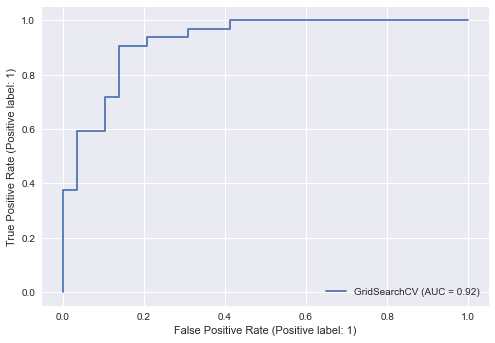

In [181]:
#Plot roc curve and calculate and calculate AUC metric

plot_roc_curve(gs_log_reg,X_test,y_test);

In [182]:
#Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


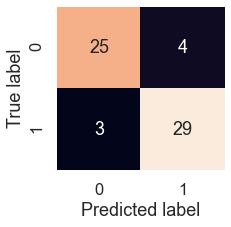

In [186]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    """
    Plot a nice looking confusion matrix using seaborne's heatmap()
    
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test,y_preds)

Now we've got roc_curve,auc metric,Confusion metrics lets get a classiication report as well as cross-validated precision,recall and f1 score.

In [191]:
print(classification_report(y_preds,y_test))#its done only X-test no cv included

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.91      0.88      0.89        33

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculated evaluation matrix using crossvalidation

We're going to calculate precision,recall,f1 score of our using cross-validation and to do so we'll be using `cross_val_score()`.

In [192]:
#Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [193]:
clf=LogisticRegression(C=0.23357214690901212,
                       solver='liblinear')

In [195]:
cv_acc=cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                      scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [196]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [197]:
cv_prec=cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                       scoring="precision")
cv_prec

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [198]:
cv_prec=np.mean(cv_prec)
cv_prec

0.8215873015873015

In [199]:
#cross validated recall
cv_recall=cross_val_score(clf,
                          X,
                          y,
                          cv=5,
                          scoring="recall")
cv_recall


array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [200]:
cv_recall=np.mean(cv_recall)
cv_recall

0.9272727272727274

In [201]:
#cross validate f1 score
cv_f1=cross_val_score(clf,
                          X,
                          y,
                          cv=5,
                          scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [202]:
cv_f1=np.mean(cv_f1)
cv_f1

0.8705403543192143

<AxesSubplot:title={'center':'Cross validated metrics'}>

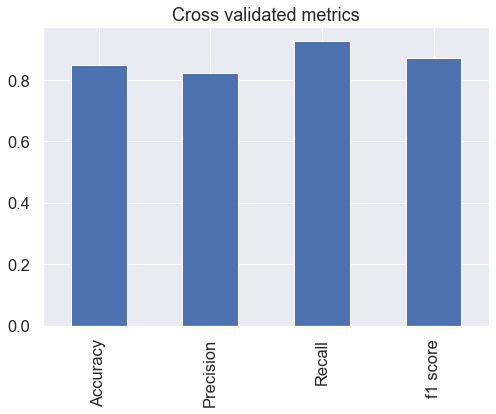

In [216]:
#visualize cross-validated metrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_prec,
                         "Recall":cv_recall,
                         "f1 score":cv_f1},index=[0])
                         
cv_metrics.T.plot(kind="bar",title="Cross validated metrics",legend=False)
                        

In [209]:
cv_metrics

,Accuracy,Precision,Recall,f1 score
0,0.847978,0.821587,0.927273,0.87054


### Feature importance

Feature importance is another as asking ,"which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model .One way to find feature importance is to search for (MODEL NAME) feature importance.

Let's find our feature importance for our logistic regression model...

In [218]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [220]:
# Fit an instance of logisticRegression

gs_log_reg.best_params_
clf=LogisticRegression(C=0.23357214690901212, solver= 'liblinear')

In [221]:
clf.fit(X_train,y_train);

In [222]:
#Check coef_
clf.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

In [224]:
#Match coef of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

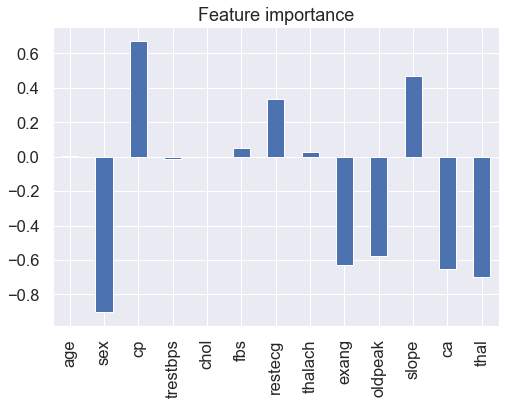

In [226]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature importance",legend=False);

In [ ]:
#It is model driven EDA Value , value for sex increase the target value decrease

In [227]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [230]:
#it tells ratio.

In [229]:
pd.crosstab(df.slope,df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6.Experimentation

If you have not hit your evaluation matric yet... ask yourself...

* Could you collect more data ?
* Could you try a better model ?Like Catboost or Xgboost ?
* Could we improve the current models ?(beyond what we've done so far)
* If your model is good enough we have hit our evaluation metrics how would we will export-->pickle,joblib